In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

## movie lense data set

In [14]:
df = pd.read_csv("resources/u.data", sep = "\t", names = column_names)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


## Get the movie titles

In [16]:
titles = pd.read_csv("resources/Movie_Id_Titles")

In [19]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [21]:
df = pd.merge(df,titles,on="item_id")

In [23]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## lets do some dsata visualization to get a better feel of the data. we will greate a dataframe with the average rating and the number of ratings. We did do a group by so the number of ratings are not onsidered so there may be movies thta are rated 5 starts but only has one rating

In [29]:
df.groupby("title")["rating"].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

### Movies with the most ratings

In [33]:
df.groupby("title")["rating"].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

### lets transform the average ratings in to a data frame. we will need to consider how many people rating it. will need to do a number of rating column

In [41]:
ratings = pd.DataFrame(df.groupby("title")['rating'].mean())

In [42]:
ratings["num of ratings"] = pd.DataFrame(df.groupby("title")['rating'].count())

In [44]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## lets explore our new data frame

## Most of the ratings ate around 0 to 1 ratings

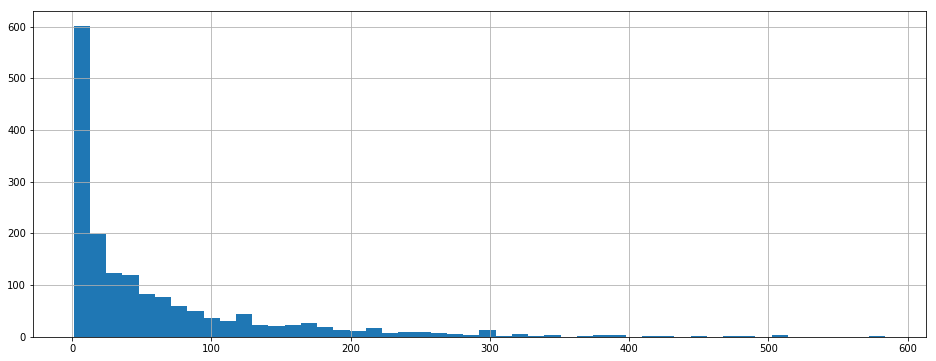

In [47]:
ratings["num of ratings"].hist(figsize = (16,6), bins = 50)

## on average there ratings are aroun 3 to 3.5 wiuch makes sence because not everyone will rate a movie 5

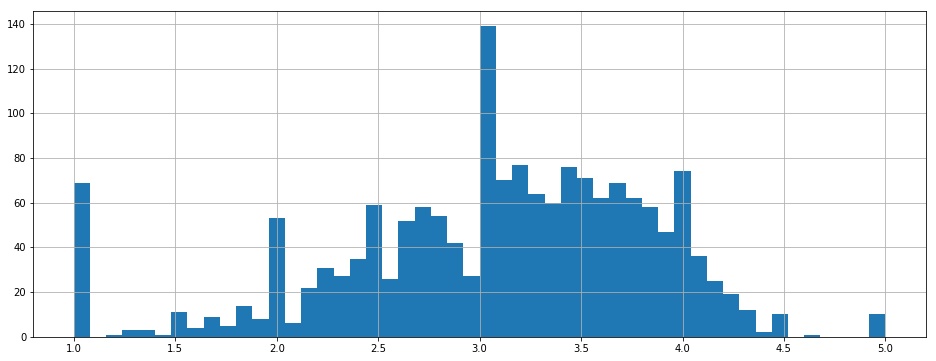

In [49]:
ratings["rating"].hist(figsize = (16,6), bins = 50)

## lets look at the distribution on rating and amount of ratings 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


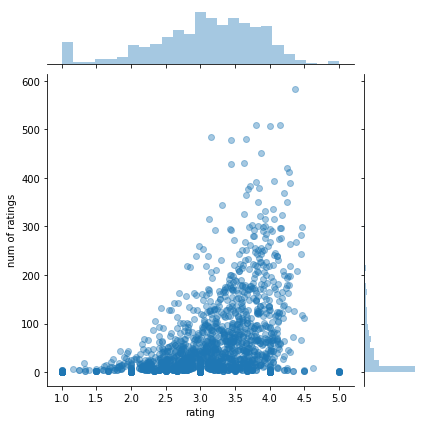

In [60]:
sns.jointplot(x = "rating", y = "num of ratings", data=ratings, alpha = 0.4);

## we will generate the rating that each user gave to a movie using a pivot table 

In [62]:
movie_matrix = df.pivot_table(index = "user_id", columns="title", values= "rating")

### we have many missing values which makes sence since not all users have watched every movie

In [69]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


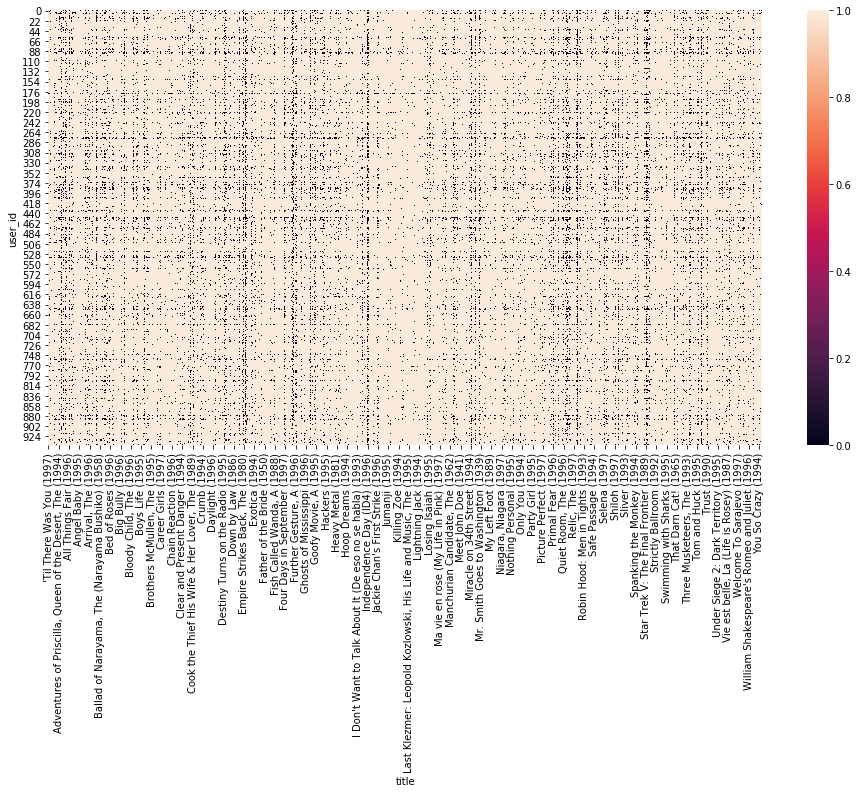

In [68]:
plt.figure(figsize=(16,8))
sns.heatmap(movie_matrix.isnull())

In [72]:
ratings.sort_values("num of ratings", ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


### WE will take two movies and get the user ratings for that movie

In [73]:
starwars_user_ratings = movie_matrix["Star Wars (1977)"]
liar_liar_user_ratings = movie_matrix["Liar Liar (1997)"]

In [75]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

### we have a series with the rating or no ratings for a movie. We wll use corr with to get the correlations between twow data frame objects. We will use this to correlation bewween the starwars movie rating and all other ratings in the movie matrix

In [79]:
corr_with_starwars = movie_matrix.corrwith(starwars_user_ratings)

In [80]:
similar_to_liar = movie_matrix.corrwith(liar_liar_user_ratings)

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


## lets convert these into a data frame to see ow correlated another moview rating was to the rating of the startwars movie. If we sort the data frame we should get a list of the similar movies in rating. We find that some movies have a 100% correlation to  starwars. This is because we are not considering the nuber or ratings. thse movies may have 1 review and tht one review is perfectly correlatied to starwars. We will need to set a threshold on the number of reviews


In [82]:
corr_to_Starwars = pd.DataFrame(corr_with_starwars, columns=["Correlation"])

In [84]:
corr_to_Starwars.dropna(inplace=True)

In [92]:
corr_to_Starwars = corr_to_Starwars.join(ratings["num of ratings"])

In [94]:
corr_to_Starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [101]:
corr_to_Starwars[corr_to_Starwars['num of ratings'] > 100].sort_values("Correlation", ascending =False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


### LEts explore Liar Liar. we wil lrepeat the same process to that we do not have many movies correlatied to liar liar. So considering the number of ratings

In [103]:
sim_to_liarDF =pd.DataFrame(similar_to_liar, columns=["Correlation"])

In [105]:
sim_to_liarDF.dropna(inplace=True)

In [108]:
sim_to_liarDF.sort_values("Correlation", ascending=False).head()

,Correlation
title,
Mina Tannenbaum (1994),1.0
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Johnny 100 Pesos (1993),1.0


In [109]:
sim_to_liarDF = sim_to_liarDF.join(ratings["num of ratings"])

In [111]:
sim_to_liarDF.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [116]:
sim_to_liarDF[sim_to_liarDF["num of ratings"] > 100].sort_values("Correlation", ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
